In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Gather
In this step I will read in the raw dataset from the csv file that was downloaded from Data.World.

In [2]:
df = pd.read_csv('data/raw_data.csv')

## Assess

In [3]:
df.head()

,school_id,state,geographic_school_district,children_5_17_saipe_estimate,poverty_saipe_estimate,single_parent_estimate,single_parent_margin_of_error,hhs_with_vulnerable_job_estimate,vulnerable_job_margin_of_error,crowded_conditions_estimate,hh_with_crowded_conditions_margin_of_error,no_computer_or_internet_estimate,no_computer_or_internet_margin_of_error,children_with_disability,children_with_disability_margin_of_error,linguistically_isolated_children,linguistically_isolated_children_margin_of_error
0,1,Alabama,Fort Rucker School District,985,0.124424,0.048975,0%-10%,0.327559,20%-46%,0.028090,0%-8%,0.020489,0%-5%,0.032487,0%-6%,0.000000,0%-3%
1,3,Alabama,Maxwell AFB School District,292,0.152263,0.101887,3%-17%,0.306513,4%-57%,0.009967,0%-10%,0.014528,0%-6%,0.054795,2%-9%,0.000000,0%-8%
2,5,Alabama,Albertville City School District,4591,0.300538,0.352926,26%-44%,0.326535,28%-37%,0.047664,3%-7%,0.221471,13%-32%,0.018079,0%-3%,0.173601,10%-24%
3,6,Alabama,Marshall County School District,8299,0.266222,0.295197,24%-35%,0.234867,21%-26%,0.026383,2%-3%,0.142486,11%-18%,0.043499,3%-6%,0.038679,1%-7%
4,7,Alabama,Hoover City School District,15397,0.072596,0.208316,17%-25%,0.292165,27%-31%,0.015485,1%-2%,0.031688,1%-5%,0.038774,2%-5%,0.044164,1%-8%


In [19]:
df.dtypes

school_id                                             int64
state                                                object
geographic_school_district                           object
children_5_17_saipe_estimate                          int64
poverty_saipe_estimate                              float64
single_parent_estimate                              float64
single_parent_margin_of_error                        object
hhs_with_vulnerable_job_estimate                    float64
vulnerable_job_margin_of_error                       object
crowded_conditions_estimate                         float64
hh_with_crowded_conditions_margin_of_error           object
no_computer_or_internet_estimate                    float64
no_computer_or_internet_margin_of_error              object
children_with_disability                            float64
children_with_disability_margin_of_error             object
linguistically_isolated_children                    float64
linguistically_isolated_children_margin_

In [20]:
df.describe()

,school_id,children_5_17_saipe_estimate,poverty_saipe_estimate,single_parent_estimate,hhs_with_vulnerable_job_estimate,crowded_conditions_estimate,no_computer_or_internet_estimate,children_with_disability,linguistically_isolated_children
count,13314.000000,1.331400e+04,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,14203.053402,4.352696e+03,0.161928,0.300393,0.261315,0.025675,0.139781,0.057484,0.021687
std,15027.794484,1.819214e+04,0.094417,0.145567,0.062967,0.032945,0.118753,0.043084,0.048998
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3934.000000,4.450000e+02,0.091779,0.203241,0.226162,0.008020,0.054255,0.030859,0.000000
50%,9540.000000,1.263500e+03,0.147465,0.288236,0.261326,0.016885,0.112354,0.050691,0.000000
75%,20967.500000,3.458500e+03,0.214746,0.381736,0.295547,0.030664,0.191661,0.076047,0.020890
max,99997.000000,1.213005e+06,1.000000,1.000000,1.000000,0.558528,1.000000,1.000000,0.772727


In [21]:
df.isnull().sum()


school_id                                           0
state                                               0
geographic_school_district                          0
children_5_17_saipe_estimate                        0
poverty_saipe_estimate                              0
single_parent_estimate                              0
single_parent_margin_of_error                       0
hhs_with_vulnerable_job_estimate                    0
vulnerable_job_margin_of_error                      0
crowded_conditions_estimate                         0
hh_with_crowded_conditions_margin_of_error          0
no_computer_or_internet_estimate                    0
no_computer_or_internet_margin_of_error             0
children_with_disability                            0
children_with_disability_margin_of_error            0
linguistically_isolated_children                    0
linguistically_isolated_children_margin_of_error    0
dtype: int64

## Clean

In [4]:
grouped_df = df.groupby('state')

## Analyze

### Which state has the most students with a parent working in a vulnerable economic sector?  

In [5]:
vulnerable_sector = grouped_df.mean()["hhs_with_vulnerable_job_estimate"].sort_values(ascending=False).head(10).to_frame()
vulnerable_sector.style.format('{:.2%}')

,hhs_with_vulnerable_job_estimate
state,
Hawaii,34.56%
Puerto Rico,31.22%
Florida,31.12%
Arizona,30.30%
Nevada,29.39%
Utah,29.34%
Rhode Island,29.30%
Delaware,28.66%
North Carolina,28.56%


Hawaii has the most students with parents working in vulnerable sectors.

### Which state has the most students living in crowded conditions?

In [6]:
crowded = grouped_df.mean()["crowded_conditions_estimate"].sort_values(ascending=False).head(10).to_frame()
crowded.style.format('{:.2%}')

,crowded_conditions_estimate
state,
Alaska,13.35%
Hawaii,9.06%
California,6.84%
Arizona,5.76%
Texas,4.06%
Washington,3.87%
District of Columbia,3.61%
Idaho,3.54%
Utah,3.45%


Alaska has the most students living in crowded conditions.

### Which state has the most students without computer or internet access?

In [7]:
lack_computer = grouped_df.mean()["no_computer_or_internet_estimate"].sort_values(ascending=False).head(10).to_frame()
lack_computer.style.format('{:.2%}')

,no_computer_or_internet_estimate
state,
Puerto Rico,31.60%
Mississippi,26.76%
New Mexico,26.00%
Arkansas,23.82%
Louisiana,23.57%
Georgia,21.81%
Oklahoma,21.69%
South Carolina,21.11%
District of Columbia,20.97%


Puerto Rico has the most students lacking a computer or internet access.

## Visualize

In [8]:
def make_plot(dataframe, title):
    '''
    INPUT: 
    dataframe - the pandas dataframe that will be used to make the chart
    title - the chart title
    
    OUTPUT:
    Horizontal bar plot of the dataset
    '''
    df = dataframe
    df.plot.barh()
    plt.title(title)
    plt.ylabel('State')
    plt.xlabel('Percentage')
    plt.show()


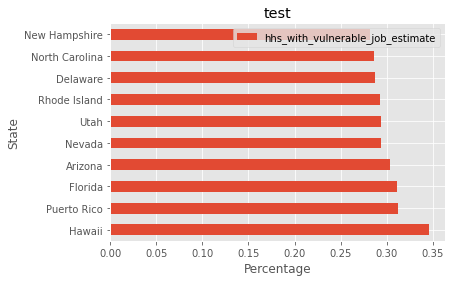

In [12]:
plt.style.use('ggplot')

make_plot(vulnerable_sector, "% Students with Parents in Vulnerable Job")


While Hawaii clearly has the most students the other 9 states have comparable percentages.

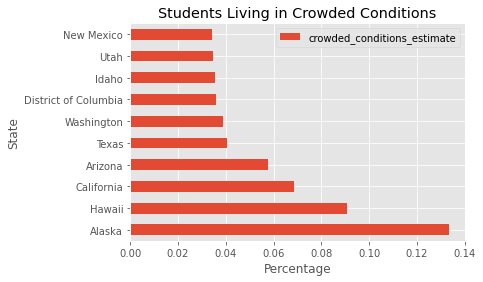

In [13]:
make_plot(crowded,'Students Living in Crowded Conditions')


Alaska has significantly more students living in crowded conditions. The difference between each state is not as close as that for vulnerable economic sectors.

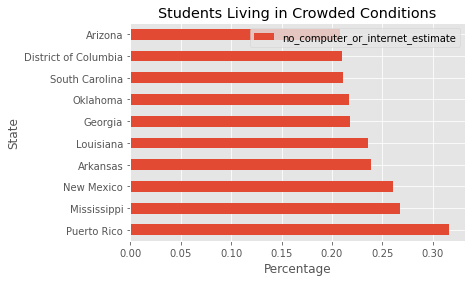

In [14]:
make_plot(lack_computer,'Students Living in Crowded Conditions')


Puerto Rico, Mississippi and New Mexico have nearly the same amount of students without computer or internet access. The other states are close to those as well.